# Capstone Project: The Battle of Neighbourhoods, GyMania

## IBM Data Science Professional Certificate

Muhsin B. Caglar, 16.02.2021

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project, we will try to outline the best locations for a gym. Specifically, the project will focus on stakeholders interested in opening a commercial gym in London, United Kingdom. 

From the begining of the 21st century, with increase in available leisure time, less people working in physically demanding jobs due to automotion, more in-depth knowledge of dietary and health knowledge and the obeisty epidemic, people are more inclined to start a physical activity routine such as getting a gym membership. Local and national gym chains have seen a very large surge in their number of members. Moreover, it is clear that once the lockdown restrictions in place due to COVID-19 are lifted, a considerable amount of people will be craving to get back out there and improve their health, wellbeing and body image.

In this project, we will try to focus on factors that effect the success of a gym business and try to optimise certain variables to identify the areas which have the most chance of success if a new gym was opened. Specifically, we will look at possible areas of oppurtunity in London, United Kingdom.

There will be several factors that we will focus on. Obviously, the number one factor will be the availablity of a gym nearby as this will increase the number of competitors. Population density will be another factor that will be considered. Also, we would look at possible oppurtunities near area centres as most people will be going to the gym prior to or after work, hence being closer to work hubs and offices will be a bonus. Also, we will consider square meter price of porperties in the areas.

Data analysis and data science tools will be used in order to analyse the available data based on the abovementioned criteria. Advantages will be outlined and the areas with best potentials will be listed.

## Data <a name="data"></a>

As previously outlined, we will require the following data:
* number of existing gyms in the given area
* population density of each area. (Based on Borough area and population)
* distance of neighborhood from borough centre

The boroughs within greater London will be devided up into the areas within it and the requried data will be collected.

Following data sources will be needed to extract/generate the required information:
* population density and square meter price of properties and area centre names will be scraped from datasets on the internet.
* Approximate coordinates of centres of areas will be obtained using **Geopy libraries Neomatim tool**
* number of gyms and locations in every neighborhood will be obtained using **Foursquare API**

In [1]:
#Install Required Packages
import pip
#!pip install lxml html5lib beautifulsoup4
#!pip install geopy
#!pip install folium
print('Package Installed')

Package Installed


In [2]:
#Import Required Libraries
import folium
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 
from sklearn.cluster import KMeans 
print('Libraries imported.')

Libraries imported.


In [3]:
#Creating initial dataframe
url = 'https://en.wikipedia.org/wiki/London_boroughs'
df = pd.read_html(url)

print(len(df))

9


In [4]:
df_areas = df[2]

In [5]:
df_areas.head()

London borough Designation      Former areas         Former areas.1  \
0                Camden       Inner   Hampstead (11a)       St Pancras (11b)   
1             Greenwich       Inner   Greenwich (22a)  Woolwich (part) (22b)   
2               Hackney       Inner      Hackney (9a)        Shoreditch (9b)   
3  Hammersmith[notes 2]       Inner  Hammersmith (4a)            Fulham (4b)   
4             Islington       Inner   Islington (10a)         Finsbury (10b)   

         Former areas.2 Former areas.3 Former areas.4  
0         Holborn (11c)            NaN            NaN  
1                   NaN            NaN            NaN  
2  Stoke Newington (9c)            NaN            NaN  
3                   NaN            NaN            NaN  
4                   NaN            NaN            NaN

In [56]:
df_areas.drop('Designation', axis = 1, inplace = True)
df_areas

London borough                  Former areas  \
0                   Camden               Hampstead (11a)   
1                Greenwich               Greenwich (22a)   
2                  Hackney                  Hackney (9a)   
3     Hammersmith[notes 2]              Hammersmith (4a)   
4                Islington               Islington (10a)   
5   Kensington and Chelsea               Kensington (3a)   
6                  Lambeth                  Lambeth (6a)   
7                 Lewisham                Lewisham (21a)   
8                Southwark               Bermondsey (7b)   
9            Tower Hamlets            Bethnal Green (8a)   
10              Wandsworth                Battersea (5b)   
11             Westminster               Paddington (2c)   
12        Barking[notes 3]          Barking (part) (25a)   
13                  Barnet                  Barnet (31a)   
14                  Bexley                  Bexley (23b)   
15                   Brent                 Wembley (12a)   
16                 Bromley                 Bromley (20c)   
17                 Croydon                 Croydon (19a)   
18                  Ealing                   Acton (13b)   
19                 Enfield                Edmonton (30c)   
20                Haringey                 Hornsey (29b)   
21                  Harrow                   Harrow (32)   
22                Havering                 Romford (24a)   
23              Hillingdon    Hayes and Harlington (33c)   
24                Hounslow  Brentford and Chiswick (14c)   
25    Kingston upon Thames    Kingston upon Thames (16a)   
26                  Merton                 Mitcham (17c)   
27                  Newham                West Ham (27a)   
28               Redbridge                  Ilford (26a)   
29    Richmond upon Thames                  Barnes (15a)   
30                  Sutton              Beddington (18c)   
31          Waltham Forest               Chingford (28a)   

                 Former areas.1              Former areas.2  \
0              St Pancras (11b)               Holborn (11c)   
1         Woolwich (part) (22b)                         NaN   
2               Shoreditch (9b)        Stoke Newington (9c)   
3                   Fulham (4b)                         NaN   
4                Finsbury (10b)                         NaN   
5                  Chelsea (3b)                         NaN   
6        Wandsworth (part) (6b)                         NaN   
7                Deptford (21b)                         NaN   
8               Camberwell (7c)              Southwark (7a)   
9                   Poplar (8c)                Stepney (8b)   
10       Wandsworth (part) (5a)                         NaN   
11           St Marylebone (2b)            Westminster (2a)   
12        Dagenham (part) (25b)                         NaN   
13            East Barnet (31b)              Finchley (31d)   
14                  Erith (23a)              Crayford (23c)   
15              Willesden (12b)                         NaN   
16              Beckenham (20b)             Orpington (20e)   
17    Coulsdon and Purley (19b)                         NaN   
18                 Ealing (13a)              Southall (13c)   
19                Enfield (30a)             Southgate (30b)   
20              Tottenham (29c)            Wood Green (29a)   
21                          NaN                         NaN   
22             Hornchurch (24b)                         NaN   
23      Ruislip Northwood (33b)              Uxbridge (33a)   
24                Feltham (14a)  Heston and Isleworth (14b)   
25      Malden and Coombe (16b)              Surbiton (16c)   
26      Merton and Morden (17b)             Wimbledon (17a)   
27               East Ham (27b)        Barking (part) (27c)   
28  Wanstead and Woodford (26b)       Dagenham (part) (26c)   
29               Richmond (15b)            Twickenham (15c)   
30             Carshalton (18b)      Sutton and Cheam (18a)   
31             

In [6]:
df_areas1 = df_areas[['Former areas','London borough']]
df_areas2 = df_areas[['Former areas.1','London borough']]
df_areas3 = df_areas[['Former areas.2','London borough']]
df_areas4 = df_areas[['Former areas.3','London borough']]
df_areas5 = df_areas[['Former areas.4','London borough']]
d= { 'Former areas.5': ['City of London'], 'London Borough': ['City of London']}
df_areas6 = pd.DataFrame(data=d)


In [7]:
pieces = (df_areas1, df_areas2, df_areas3, df_areas4, df_areas5, df_areas6)
# Give all df's common column names
for sub_df in pieces:
    sub_df.columns=['Area', 'Borough']

df_final = pd.concat(pieces, ignore_index = False)


In [8]:
df_final

Area               Borough
0    Hampstead (11a)                Camden
1    Greenwich (22a)             Greenwich
2       Hackney (9a)               Hackney
3   Hammersmith (4a)  Hammersmith[notes 2]
4    Islington (10a)             Islington
..               ...                   ...
28               NaN             Redbridge
29               NaN  Richmond upon Thames
30               NaN                Sutton
31               NaN        Waltham Forest
0     City of London        City of London

[161 rows x 2 columns]

In [9]:
df_final['Borough'] = df_final['Borough'].str.split("[").str[0]
df_final['Area'] = df_final['Area'].str.split("(").str[0]
df_final['Area'] = df_final['Area'].str.strip()
df_final.iloc[2]['Area']

'Hackney'

In [10]:
df_final.dropna(inplace=True)
df_final.shape
total_rows = df_final['Area'].count
total_rows

<bound method Series.count of 0                  Hampstead
1                  Greenwich
2                    Hackney
3                Hammersmith
4                  Islington
               ...          
27                  Woolwich
28                  Chigwell
13             Friern Barnet
16    Chislehurst and Sidcup
0             City of London
Name: Area, Length: 92, dtype: object>

In [11]:
df_final = df_final.drop_duplicates(subset='Area', keep='first')
df_final.shape

(87, 2)

In [14]:
latitudes = []
longitudes = []
area = []
total_rows = df_final['Area'].count
for i in range(87):

    address = str(df_final.iloc[i]['Area']) +', London'
    area.append(str(df_final.iloc[i]['Area']))
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitudes.append(location.latitude)
    longitudes.append(location.longitude)
    print("The coordinates for " + str(df_final.iloc[i]['Area']) + " " + str(location.latitude) + "," + str(location.longitude))

The coordinates for Hampstead 51.5580835,-0.1737206
The coordinates for Greenwich 51.4820845,-0.0045417
The coordinates for Hackney 51.5432402,-0.0493621
The coordinates for Hammersmith 51.4920377,-0.2236401
The coordinates for Islington 51.5384287,-0.0999051
The coordinates for Kensington 51.4989948,-0.1991229
The coordinates for Lambeth 51.5013012,-0.117287
The coordinates for Lewisham 51.4624325,-0.0101331
The coordinates for Bermondsey 51.4970125,-0.063268
The coordinates for Bethnal Green 51.5303456,-0.0561633
The coordinates for Battersea 51.4707933,-0.172214
The coordinates for Paddington 51.5170856,-0.1775422
The coordinates for Barking 51.5389922,0.0804245
The coordinates for Barnet 51.65309,-0.2002261
The coordinates for Bexley 51.4416793,0.150488
The coordinates for Wembley 51.5531547,-0.2957562
The coordinates for Bromley 51.4028046,0.0148142
The coordinates for Croydon 51.3713049,-0.101957
The coordinates for Acton 51.5081402,-0.2732607
The coordinates for Edmonton 51.6267

In [15]:
len(latitudes)

87

In [16]:
location_info= pd.DataFrame()
location_info['Area'] = area
location_info['Latitude'] = latitudes
location_info['Longitude'] = longitudes

location_info

Area   Latitude  Longitude
0                   Hampstead  51.558084  -0.173721
1                   Greenwich  51.482084  -0.004542
2                     Hackney  51.543240  -0.049362
3                 Hammersmith  51.492038  -0.223640
4                   Islington  51.538429  -0.099905
..                        ...        ...        ...
82                      Penge  51.414684  -0.053421
83  Yiewsley and West Drayton  51.510294  -0.455540
84                   Chigwell  51.598347   0.037144
85              Friern Barnet  51.612879  -0.158595
86             City of London  51.515618  -0.091998

[87 rows x 3 columns]

In [17]:
df_final = pd.merge(df_final,location_info)
df_final


Area         Borough   Latitude  Longitude
0                   Hampstead          Camden  51.558084  -0.173721
1                   Greenwich       Greenwich  51.482084  -0.004542
2                     Hackney         Hackney  51.543240  -0.049362
3                 Hammersmith     Hammersmith  51.492038  -0.223640
4                   Islington       Islington  51.538429  -0.099905
..                        ...             ...        ...        ...
82                      Penge         Bromley  51.414684  -0.053421
83  Yiewsley and West Drayton      Hillingdon  51.510294  -0.455540
84                   Chigwell       Redbridge  51.598347   0.037144
85              Friern Barnet          Barnet  51.612879  -0.158595
86             City of London  City of London  51.515618  -0.091998

[87 rows x 4 columns]

In [18]:
df_final = df_final.drop_duplicates(subset='Area', keep='first')
df_final

Area         Borough   Latitude  Longitude
0                   Hampstead          Camden  51.558084  -0.173721
1                   Greenwich       Greenwich  51.482084  -0.004542
2                     Hackney         Hackney  51.543240  -0.049362
3                 Hammersmith     Hammersmith  51.492038  -0.223640
4                   Islington       Islington  51.538429  -0.099905
..                        ...             ...        ...        ...
82                      Penge         Bromley  51.414684  -0.053421
83  Yiewsley and West Drayton      Hillingdon  51.510294  -0.455540
84                   Chigwell       Redbridge  51.598347   0.037144
85              Friern Barnet          Barnet  51.612879  -0.158595
86             City of London  City of London  51.515618  -0.091998

[87 rows x 4 columns]

In [19]:
from matplotlib import cm
from matplotlib import colors

address = 'London, United Kingdom'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))


# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map

for lat, lon, poi, in zip(df_final['Latitude'], df_final['Longitude'], df_final['Area'] ):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='#3186cc',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [20]:
#Creating initial dataframe
url1 = 'https://en.wikipedia.org/wiki/List_of_English_districts_by_population_density'
df_pop = pd.read_html(url1)

print(len(df_pop))

5


In [21]:
df_pop1 = df_pop[0]
df_pop2 = df_pop[1]
df_pop3 = df_pop[2]
df_pop1.head()


Rank                District  Density(per km²)  \
0     1               Islington             16097   
1     2           Tower Hamlets             16057   
2     3                 Hackney             14681   
3     4  Kensington and Chelsea             12884   
4     5                 Lambeth             12157   

                Type of district Ceremonial county  
0                 London borough    Greater London  
1                 London borough    Greater London  
2                 London borough    Greater London  
3  London borough, Royal Borough    Greater London  
4                 London borough    Greater London

In [22]:
df_pop1.drop('Rank', axis = 1, inplace = True)
df_pop1.drop('Type of district', axis = 1, inplace = True)
df_pop2.drop('Rank', axis = 1, inplace = True)
df_pop2.drop('Type of district', axis = 1, inplace = True)
df_pop3.drop('Rank', axis = 1, inplace = True)
df_pop3.drop('Type of district', axis = 1, inplace = True)
df_pop1.drop('Ceremonial county', axis = 1, inplace = True)
df_pop2.drop('Ceremonial county', axis = 1, inplace = True)
df_pop3.drop('Ceremonial county', axis = 1, inplace = True)

In [23]:
populationdensitypieces = (df_pop1, df_pop2, df_pop3)
df_populationdensity = pd.concat(populationdensitypieces, ignore_index = True)

In [24]:
df_populationdensity.shape

(295, 2)

In [25]:
df_populationdensity.rename(columns={"District": "Borough"}, inplace = True)
df_populationdensity.head()

Borough  Density(per km²)
0               Islington             16097
1           Tower Hamlets             16057
2                 Hackney             14681
3  Kensington and Chelsea             12884
4                 Lambeth             12157

In [26]:
df_final


df_final1 = pd.merge(df_final, df_populationdensity, on='Borough')
df_final1

Area         Borough   Latitude  Longitude  Density(per km²)
0          Hampstead          Camden  51.558084  -0.173721             12035
1         St Pancras          Camden  51.525915  -0.129097             12035
2            Holborn          Camden  51.517934  -0.119528             12035
3          Greenwich       Greenwich  51.482084  -0.004542              6046
4           Woolwich       Greenwich  51.482670   0.062334              6046
..               ...             ...        ...        ...               ...
78  Sutton and Cheam          Sutton  51.360268  -0.197670              4665
79         Chingford  Waltham Forest  51.630887   0.003996              7130
80            Leyton  Waltham Forest  51.569673  -0.015681              7130
81       Walthamstow  Waltham Forest  51.584470  -0.018819              7130
82    City of London  City of London  51.515618  -0.091998              2998

[83 rows x 5 columns]

In [27]:
df_final1.shape

(83, 5)

In [28]:
from matplotlib import cm
from matplotlib import colors

address = 'London, United Kingdom'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))


# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map

for lat, lon, poi, in zip(df_final1['Latitude'], df_final1['Longitude'], df_final1['Area'] ):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#red',
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [34]:
df_boroughdata =df_final1[['Borough']]
df_boroughdata = df_boroughdata.drop_duplicates(subset='Borough', keep='first')
df_boroughdata.shape

(31, 1)

In [36]:
latitudes_borough = []
longitudes_borough = []
borough = []

for i in range(31):

    address = str(df_boroughdata.iloc[i]['Borough']) +', London'
    borough.append(str(df_boroughdata.iloc[i]['Borough']))
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitudes_borough.append(location.latitude)
    longitudes_borough.append(location.longitude)
    print("The coordinates for " + str(df_boroughdata.iloc[i]['Borough']) + " " + str(location.latitude) + "," + str(location.longitude))

The coordinates for Camden 51.5423045,-0.1395604
The coordinates for Greenwich 51.4820845,-0.0045417
The coordinates for Hackney 51.5432402,-0.0493621
The coordinates for Islington 51.5384287,-0.0999051
The coordinates for Kensington and Chelsea 51.498480400000005,-0.1990432138025393
The coordinates for Lambeth 51.5013012,-0.117287
The coordinates for Lewisham 51.4624325,-0.0101331
The coordinates for Southwark 51.5029222,-0.103458
The coordinates for Tower Hamlets 51.5256294,-0.0335853
The coordinates for Wandsworth 51.4570271,-0.1932607
The coordinates for Westminster 51.5004439,-0.1265398
The coordinates for Barnet 51.65309,-0.2002261
The coordinates for Bexley 51.4416793,0.150488
The coordinates for Brent 51.563825800000004,-0.2757596561855699
The coordinates for Bromley 51.4028046,0.0148142
The coordinates for Croydon 51.3713049,-0.101957
The coordinates for Ealing 51.5126553,-0.3051952
The coordinates for Enfield 51.6520851,-0.0810175
The coordinates for Haringey 51.6014736,-0.11

In [37]:
borough_location_info= pd.DataFrame()
borough_location_info['Borough'] = borough
borough_location_info['Latitude'] = latitudes_borough
borough_location_info['Longitude'] = longitudes_borough

borough_location_info

Borough   Latitude  Longitude
0                   Camden  51.542305  -0.139560
1                Greenwich  51.482084  -0.004542
2                  Hackney  51.543240  -0.049362
3                Islington  51.538429  -0.099905
4   Kensington and Chelsea  51.498480  -0.199043
5                  Lambeth  51.501301  -0.117287
6                 Lewisham  51.462432  -0.010133
7                Southwark  51.502922  -0.103458
8            Tower Hamlets  51.525629  -0.033585
9               Wandsworth  51.457027  -0.193261
10             Westminster  51.500444  -0.126540
11                  Barnet  51.653090  -0.200226
12                  Bexley  51.441679   0.150488
13                   Brent  51.563826  -0.275760
14                 Bromley  51.402805   0.014814
15                 Croydon  51.371305  -0.101957
16                  Ealing  51.512655  -0.305195
17                 Enfield  51.652085  -0.081018
18                Haringey  51.601474  -0.111782
19                  Harrow  51.596827  -0.337316
20                Havering  51.544385  -0.144307
21              Hillingdon  51.542519  -0.448335
22                Hounslow  51.468613  -0.361347
23    Kingston upon Thames  51.409627  -0.306262
24                  Merton  51.410870  -0.188097
25                  Newham  51.530000   0.029318
26               Redbridge  51.576320   0.045410
27    Richmond upon Thames  51.440553  -0.307639
28                  Sutton  51.357464  -0.173627
29          Waltham Forest  51.598169  -0.017837
30          City of London  51.515618  -0.091998

In [74]:
neighbourhood_latitude = df_final1.loc[0, 'Latitude'] # neighborhood latitude value
neighbourhood_longitude = df_final1.loc[0, 'Longitude'] # neighborhood longitude value

neighbourhood_name = df_final1.loc[0, 'Area'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of Hampstead are 51.5580835, -0.1737206.


In [113]:
def getNearbyVenues(names, latitudes, longitudes, radius=1600):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [114]:
CLIENT_ID = 'K0DXEJMKEJAR24PBEBDQUYIZ4P5EKIGZB34IVZ0DQGESK451' # your Foursquare ID
CLIENT_SECRET = 'L1HF4PZEYIKX3TAEG53IPM4X3I0RI3YM0AO0LRAY1JVQWQES' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbourhood_latitude, 
    neighbourhood_longitude, 
    radius, 
    LIMIT)


In [115]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '602d3f79443e2c5300223108'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Hampstead Town',
  'headerFullLocation': 'Hampstead Town, London',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 59,
  'suggestedBounds': {'ne': {'lat': 51.562583504500004,
    'lng': -0.16649613300643853},
   'sw': {'lat': 51.5535834955, 'lng': -0.18094506699356147}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ac61631f964a520cab220e3',
       'name': 'The Wells',
       'location': {'address': '30 Well Walk',
        'crossStreet': 'Christchurch Hill',
        'lat': 51.55862188598442,
        'lng': -0.1738013059083379,
        'labeledLatLngs'

In [116]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [117]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-117-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


name           categories        lat       lng
0                   The Wells            Gastropub  51.558622 -0.173801
1           L'Antica Pizzeria          Pizza Place  51.557318 -0.178273
2  Jin Kichi | 人吉 (Jin Kichi)  Japanese Restaurant  51.557211 -0.178370
3    La Crêperie de Hampstead             Creperie  51.555909 -0.177051
4                 Waterstones            Bookstore  51.556080 -0.177492

In [123]:
london_venues = getNearbyVenues(names=df_final1['Area'],
                                   latitudes=df_final1['Latitude'],
                                   longitudes=df_final1['Longitude']
                                  )

Hampstead
St Pancras
Holborn
Greenwich
Woolwich
Hackney
Shoreditch
Stoke Newington
Islington
Finsbury
Kensington
Chelsea
Lambeth
Wandsworth
Lewisham
Deptford
Bermondsey
Camberwell
Southwark
Bethnal Green
Poplar
Stepney
Battersea
Paddington
St Marylebone
Westminster
Barnet
East Barnet
Finchley
Hendon
Friern Barnet
Bexley
Erith
Crayford
Chislehurst and Sidcup
Wembley
Willesden
Bromley
Beckenham
Orpington
Penge
Croydon
Coulsdon and Purley
Acton
Ealing
Southall
Edmonton
Enfield
Southgate
Hornsey
Tottenham
Wood Green
Harrow
Romford
Hornchurch
Hayes and Harlington
Ruislip Northwood
Uxbridge
Yiewsley and West Drayton
Brentford and Chiswick
Feltham
Heston and Isleworth
Kingston upon Thames
Malden and Coombe
Surbiton
Mitcham
Merton and Morden
Wimbledon
West Ham
East Ham
Ilford
Wanstead and Woodford
Chigwell
Barnes
Richmond
Twickenham
Beddington
Carshalton
Sutton and Cheam
Chingford
Leyton
Walthamstow
City of London


In [124]:
print(london_venues.shape)
london_venues.head()

(6214, 7)


Neighbourhood  Neighbourhood Latitude  Neighbourhood Longitude  \
0     Hampstead               51.558084                -0.173721   
1     Hampstead               51.558084                -0.173721   
2     Hampstead               51.558084                -0.173721   
3     Hampstead               51.558084                -0.173721   
4     Hampstead               51.558084                -0.173721   

                        Venue  Venue Latitude  Venue Longitude  \
0                   The Wells       51.558622        -0.173801   
1           L'Antica Pizzeria       51.557318        -0.178273   
2  Jin Kichi | 人吉 (Jin Kichi)       51.557211        -0.178370   
3    La Crêperie de Hampstead       51.555909        -0.177051   
4             Everyman Cinema       51.556358        -0.178907   

        Venue Category  
0            Gastropub  
1          Pizza Place  
2  Japanese Restaurant  
3             Creperie  
4        Movie Theater

In [125]:
london_venues['Venue Category'].nunique()

336

In [127]:
london_venues = london_venues[london_venues['Venue Category'].str.match('Gym')]


In [128]:
london_venues
london_venues.shape

(185, 7)

In [129]:
from matplotlib import cm
from matplotlib import colors

address = 'London, United Kingdom'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))


# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map

for lat, lon, poi, in zip(london_venues['Venue Latitude'], london_venues['Venue Longitude'], london_venues['Venue'] ):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

The geograpical coordinate of London are 51.5073219, -0.1276474.


The above folium map denotes all gyms within a mile of the given neighbourhood centre. 

In [157]:
london_grouped = london_venues.groupby('Neighbourhood').count()
london_grouped.head()


Neighbourhood Latitude  Neighbourhood Longitude  Venue  \
Neighbourhood                                                           
Acton                               7                        7      7   
Barnes                              5                        5      5   
Beckenham                           2                        2      2   
Beddington                          1                        1      1   
Bermondsey                          1                        1      1   

               Venue Latitude  Venue Longitude  Venue Category  
Neighbourhood                                                   
Acton                       7                7               7  
Barnes                      5                5               5  
Beckenham                   2                2               2  
Beddington                  1                1               1  
Bermondsey                  1                1               1

In [158]:
london_grouped.drop('Neighbourhood Latitude', axis = 1, inplace = True)


In [159]:
london_grouped.drop('Neighbourhood Longitude', axis = 1, inplace = True)
london_grouped.drop('Venue Latitude', axis = 1, inplace = True)
london_grouped.drop('Venue Longitude', axis = 1, inplace = True)
london_grouped.drop('Venue Category', axis = 1, inplace = True)

london_grouped

Venue
Neighbourhood                   
Acton                          7
Barnes                         5
Beckenham                      2
Beddington                     1
Bermondsey                     1
...                          ...
Willesden                      2
Wimbledon                      4
Wood Green                     1
Woolwich                       3
Yiewsley and West Drayton      1

[70 rows x 1 columns]

In [160]:
london_grouped.index.names = ['Area']
london_grouped

Venue
Area                            
Acton                          7
Barnes                         5
Beckenham                      2
Beddington                     1
Bermondsey                     1
...                          ...
Willesden                      2
Wimbledon                      4
Wood Green                     1
Woolwich                       3
Yiewsley and West Drayton      1

[70 rows x 1 columns]

In [218]:
df_final2 = pd.merge(df_final1, london_grouped, on='Area')
df_final2

Area         Borough   Latitude  Longitude  Density(per km²)  \
0          Hampstead          Camden  51.558084  -0.173721             12035   
1         St Pancras          Camden  51.525915  -0.129097             12035   
2            Holborn          Camden  51.517934  -0.119528             12035   
3          Greenwich       Greenwich  51.482084  -0.004542              6046   
4           Woolwich       Greenwich  51.482670   0.062334              6046   
..               ...             ...        ...        ...               ...   
65        Carshalton          Sutton  51.365788  -0.161086              4665   
66  Sutton and Cheam          Sutton  51.360268  -0.197670              4665   
67            Leyton  Waltham Forest  51.569673  -0.015681              7130   
68       Walthamstow  Waltham Forest  51.584470  -0.018819              7130   
69    City of London  City of London  51.515618  -0.091998              2998   

    Venue  
0       2  
1       3  
2       3  
3       2  
4       3  
..    ...  
65      1  
66      2  
67      3  
68      4  
69      7  

[70 rows x 6 columns]

In [219]:
df_final3 = pd.DataFrame(df_final2)
df_final3.drop('Area', axis = 1, inplace = True)
df_final3.drop('Borough', axis = 1, inplace = True)
df_final3

Latitude  Longitude  Density(per km²)  Venue
0   51.558084  -0.173721             12035      2
1   51.525915  -0.129097             12035      3
2   51.517934  -0.119528             12035      3
3   51.482084  -0.004542              6046      2
4   51.482670   0.062334              6046      3
..        ...        ...               ...    ...
65  51.365788  -0.161086              4665      1
66  51.360268  -0.197670              4665      2
67  51.569673  -0.015681              7130      3
68  51.584470  -0.018819              7130      4
69  51.515618  -0.091998              2998      7

[70 rows x 4 columns]

In [171]:
df_final2['Venue'] = df_final2['Venue'].fillna(0)
df_final2

Area         Borough   Latitude  Longitude  Density(per km²)  \
0          Hampstead          Camden  51.558084  -0.173721             12035   
1         St Pancras          Camden  51.525915  -0.129097             12035   
2            Holborn          Camden  51.517934  -0.119528             12035   
3          Greenwich       Greenwich  51.482084  -0.004542              6046   
4           Woolwich       Greenwich  51.482670   0.062334              6046   
..               ...             ...        ...        ...               ...   
78  Sutton and Cheam          Sutton  51.360268  -0.197670              4665   
79         Chingford  Waltham Forest  51.630887   0.003996              7130   
80            Leyton  Waltham Forest  51.569673  -0.015681              7130   
81       Walthamstow  Waltham Forest  51.584470  -0.018819              7130   
82    City of London  City of London  51.515618  -0.091998              2998   

    Venue  
0     2.0  
1     3.0  
2     3.0  
3     2.0  
4     3.0  
..    ...  
78    2.0  
79    0.0  
80    3.0  
81    4.0  
82    7.0  

[83 rows x 6 columns]

## Methodology <a name="methodology"></a>

In this project, we will try to identify significant trends between data available and where current gyms in London are located. We will mainly focus on population density and gyms that are 1 mile away from the neighbourhood centre. First step was to collate the data required which was scraped of the internet and Foursquare was used to get data for the venues available in London. The data collected consisted of the population density of each borough, the areas within the borough, latitude and longitude of the centre of each area.

Second step was to calculate gym density across different areas of London. Heatmaps were produced in oder to identify promising areas close to neighbourhood centres where few or no gyms operated. 

Third step was to preprocess the available data to allow for kNN algorithm to be utilised. The algorithm was used to cluster the available data of number gyms based on population density and the number of venues available in each area. This will allow for further analysis on the aspects that determine where gyms usually operate and identify possible areas that can be expolated for a successful gym business.


## Analysis <a name="analysis"></a>

In [250]:
london_areas_url = 'https://skgrange.github.io/www/data/london_boroughs.json'
london_areas = requests.get(london_areas_url).json()

def area_style(feature):
    return { 'color': 'blue', 'fill': False }



In [251]:
gym_latlons = pd.DataFrame(london_venues[['Venue Latitude', 'Venue Longitude']])

In [252]:
from folium import plugins
from folium.plugins import HeatMap

address = 'London, United Kingdom'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

map_london = folium.Map(location=[latitude, longitude], zoom_start=13)
HeatMap(gym_latlons).add_to(map_london)
folium.GeoJson(london_areas, style_function=area_style, name='json').add_to(map_london)
map_london

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [220]:
# set number of clusters
kclusters = 5

london_grouped_clustering = df_final3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 0, 0, 1, 1, 1, 1, 2])

In [221]:
# add clustering labels
df_final2.insert(0, 'Cluster Labels', kmeans.labels_)

df_final2

Cluster Labels              Area         Borough   Latitude  Longitude  \
0                2         Hampstead          Camden  51.558084  -0.173721   
1                2        St Pancras          Camden  51.525915  -0.129097   
2                2           Holborn          Camden  51.517934  -0.119528   
3                0         Greenwich       Greenwich  51.482084  -0.004542   
4                0          Woolwich       Greenwich  51.482670   0.062334   
..             ...               ...             ...        ...        ...   
65               0        Carshalton          Sutton  51.365788  -0.161086   
66               0  Sutton and Cheam          Sutton  51.360268  -0.197670   
67               4            Leyton  Waltham Forest  51.569673  -0.015681   
68               4       Walthamstow  Waltham Forest  51.584470  -0.018819   
69               3    City of London  City of London  51.515618  -0.091998   

    Density(per km²)  Venue  
0              12035      2  
1              12035      3  
2              12035      3  
3               6046      2  
4               6046      3  
..               ...    ...  
65              4665      1  
66              4665      2  
67              7130      3  
68              7130      4  
69              2998      7  

[70 rows x 7 columns]

In [234]:
london_areas_url1 = 'https://skgrange.github.io/www/data/london_boroughs.json'
state_geo = requests.get(london_areas_url1).json()
state_data = pd.DataFrame(df_populationdensity[['Borough','Density(per km\u00b2)']])
state_data

Borough  Density(per km²)
0                       Islington             16097
1                   Tower Hamlets             16057
2                         Hackney             14681
3          Kensington and Chelsea             12884
4                         Lambeth             12157
..                            ...               ...
290  King's Lynn and West Norfolk               106
291                      Carlisle               104
292                       Rutland               104
293                 Ribble Valley               103
294                    Shropshire               100

[295 rows x 2 columns]

In [249]:
address = 'London, United Kingdom'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))


# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)


map_clusters.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['Borough', 'Density(per km\u00b2)'],
 key_on='properties.name',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Population Density (per km\u00b2)'
)
folium.LayerControl().add_to(map_clusters)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_final2['Latitude'], df_final2['Longitude'], df_final2['Area'], df_final2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)



map_clusters


The geograpical coordinate of London are 51.5073219, -0.1276474.


## Results and Discussion <a name="results"></a>

The results of the kNN algorithm clearly show that their is a positive correlation between population density and number of gyms operating in a given area. The heatmap produced also prove this point. The maps produced further showed that areas such as Brixton in the South of London and Hackney in the North of London have very few gyms for there given areas and population densities. These areas may be of intrest to stakeholders looking to open or expand their gym business. These areas may need further analysis and street level investigation to solidify the findings of this data analysis project. 

The kNN algorithm is very robust and produced very good results in this case however, the scope of the project can be extended to include other machine learning algorithms to further solidify the findings. Further elbow method analysis on the kNN algorithm can be used to improve and optimise the k value that will be used. 

## Conclusion <a name="conclusion"></a>

The findings above are based on pretty concrete evedince. I believe with timely updates to this kind of data science projects, new lucaritive business oppurtunities can be found before they are realised by the general public or the common businessperson. Data science allows for huge amounts of knowledge to be acquired in a short time which is a huge leverage when making decisions of any kind. I believe data science will play a huge role in both finance and innovation in the near future and I hope to be a part of it. The project has immensely furthered my understanding of data science. I hope to use and improve the skills I have gained from this course in the future.

As this project will not be trusted by your computer I have included screenshot of all the maps and figures produced.
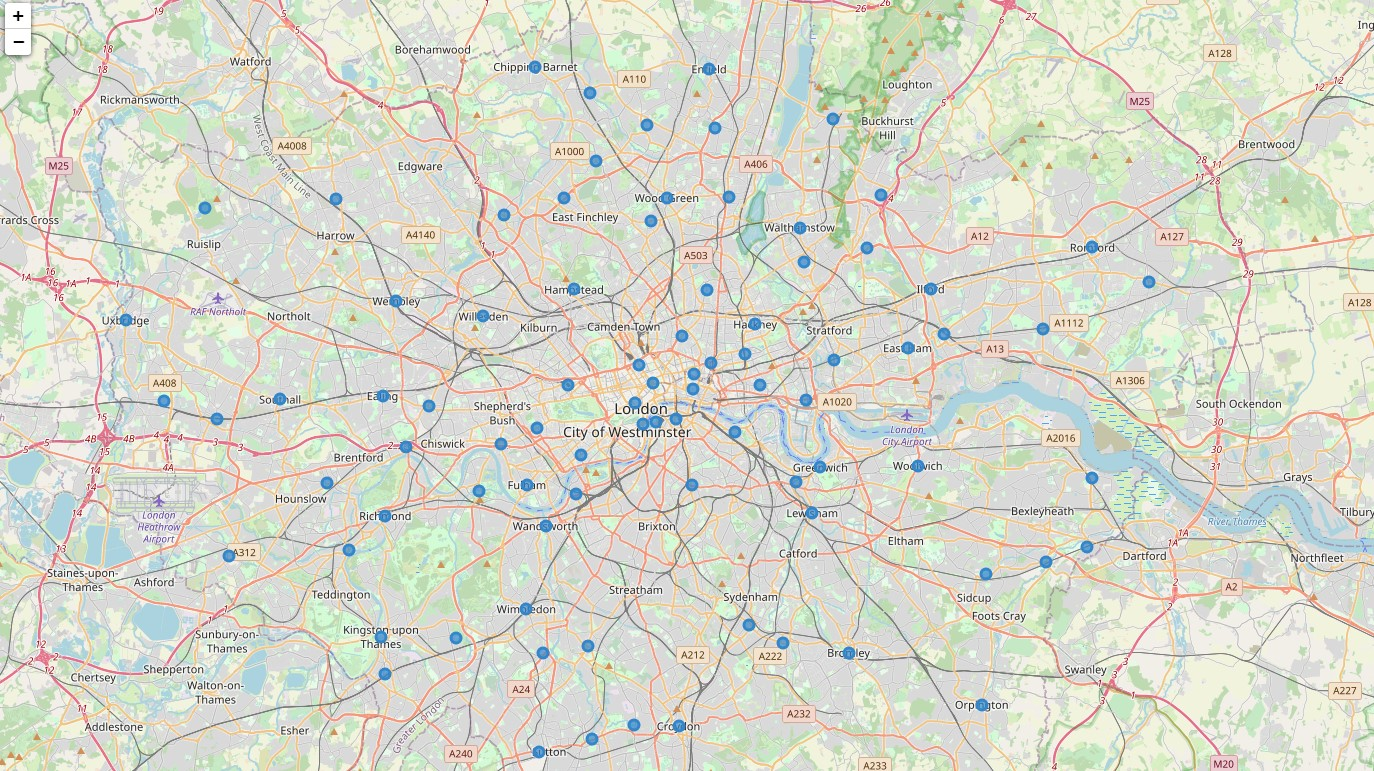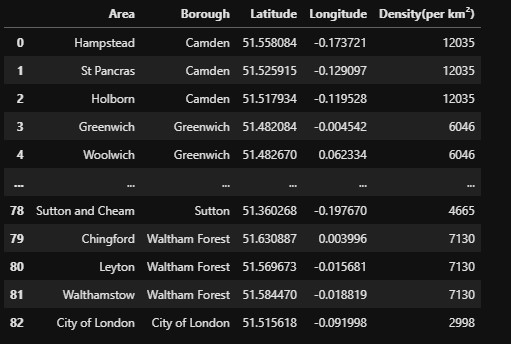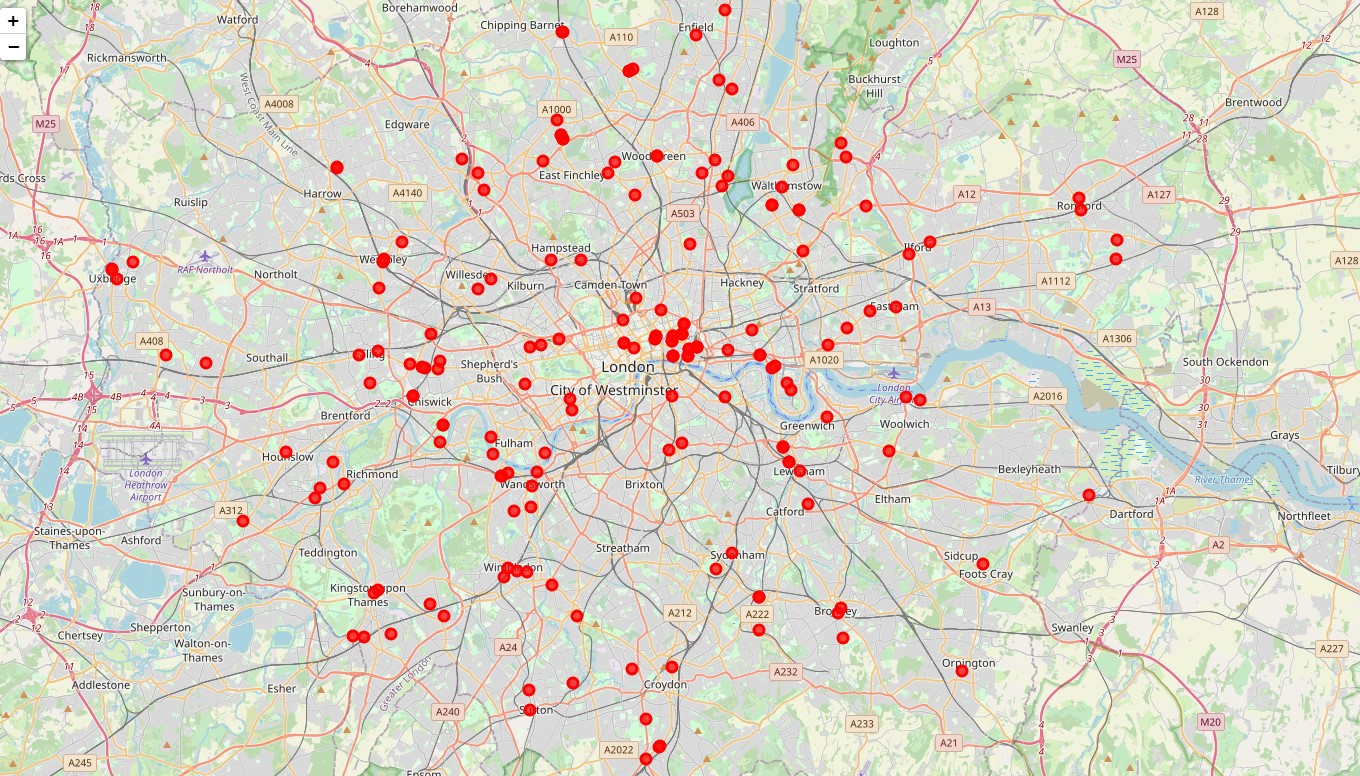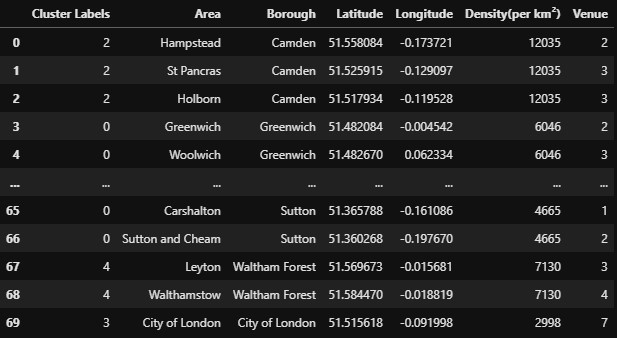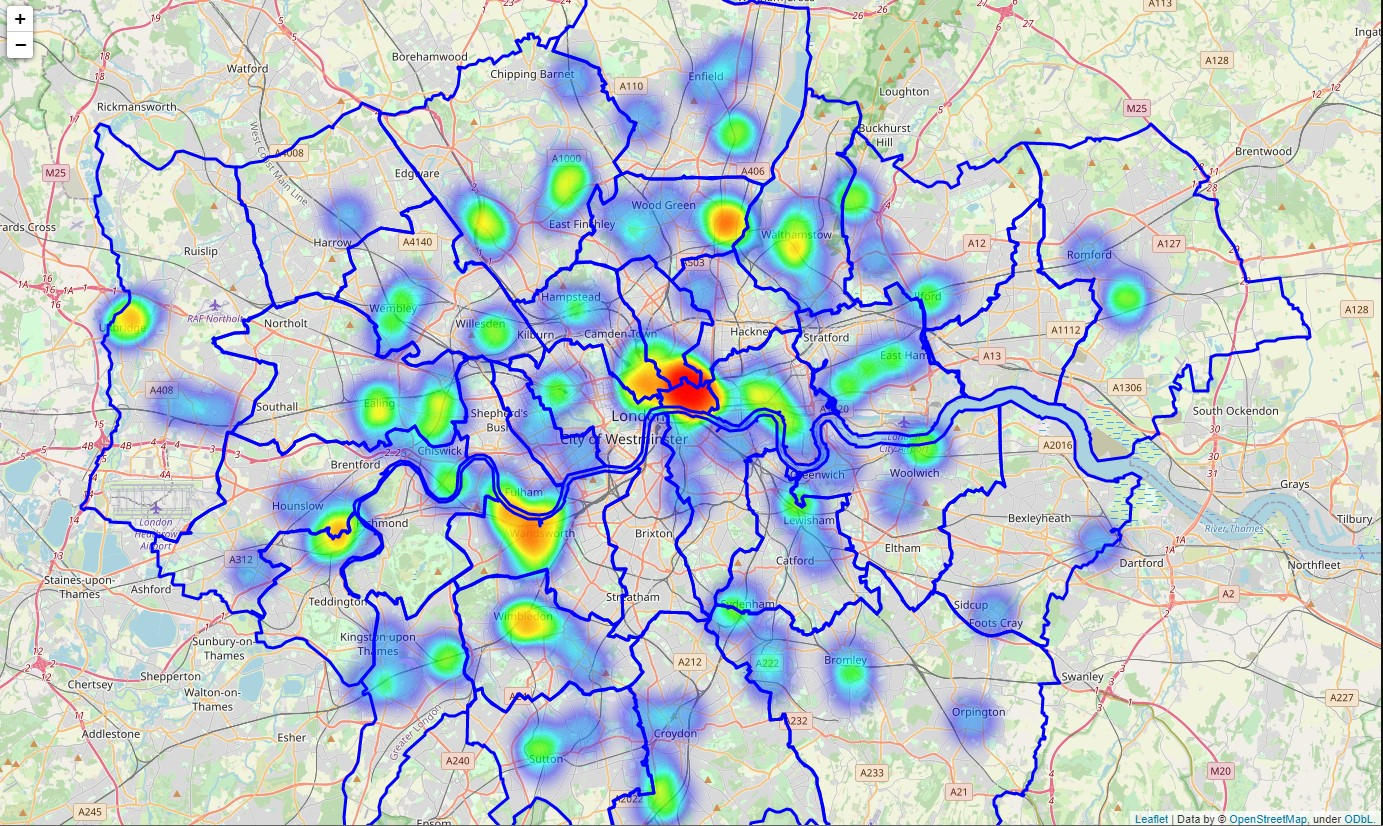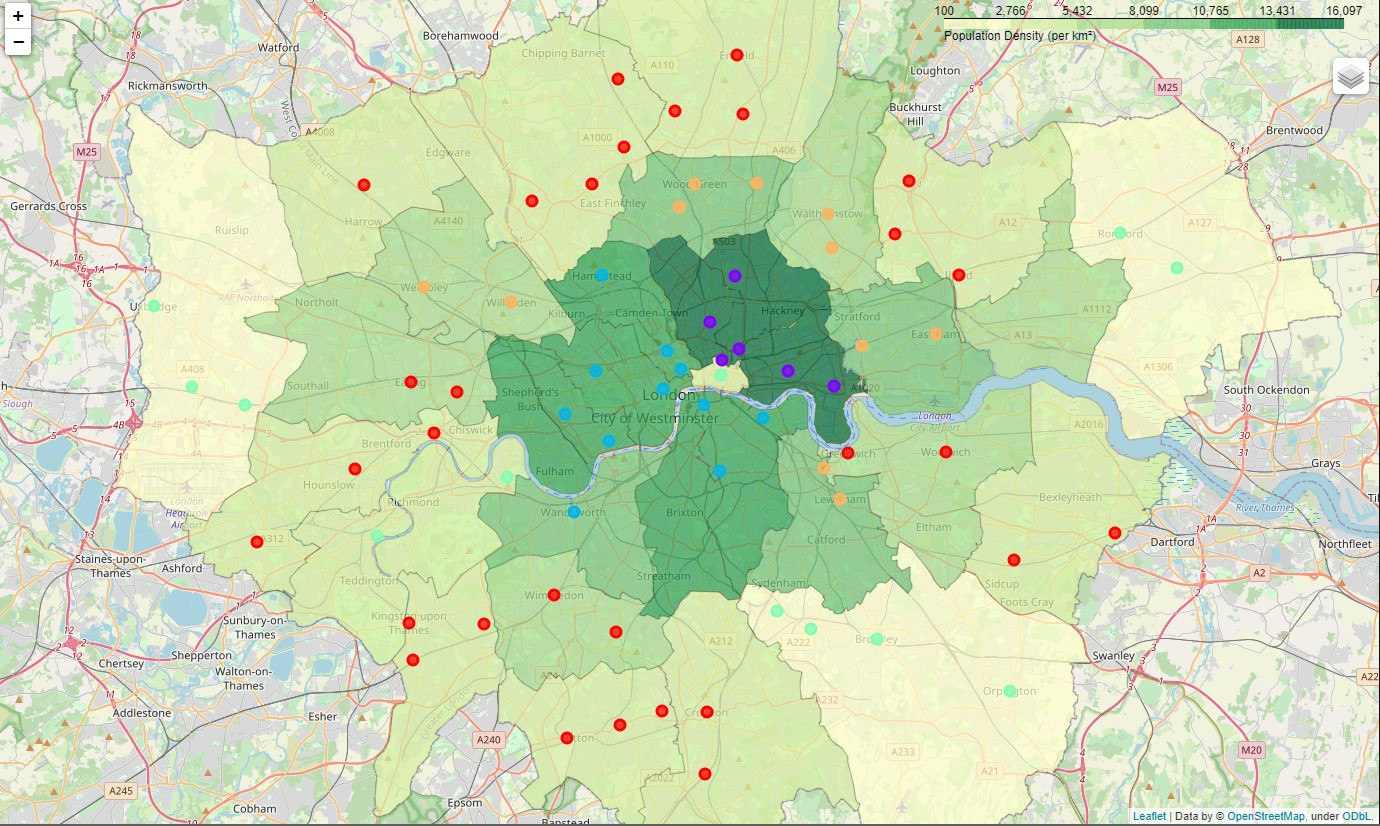